# Full Analysis Notebook

Data was downloaded throught the planetscope download portal

In [3]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import os, glob
from osgeo import gdal
import subprocess

In [15]:
!gdalinfo ~/Documents/PhD_Materials/github_repos/Tadych_PlanetData_Challenge/Data/RapidEye/1354105_2010-03-25_RE5_3A_Analytic_SR_clip.tif

Driver: GTiff/GeoTIFF
Files: /Users/danielletadych/Documents/PhD_Materials/github_repos/Tadych_PlanetData_Challenge/Data/RapidEye/1354105_2010-03-25_RE5_3A_Analytic_SR_clip.tif
       /Users/danielletadych/Documents/PhD_Materials/github_repos/Tadych_PlanetData_Challenge/Data/RapidEye/1354105_2010-03-25_RE5_3A_Analytic_SR_clip.tif.aux.xml
Size is 248, 309
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 13N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 13N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-105,
            ANGLEUNIT["degree

In [42]:
ls Data/RapidEye/*RE*_3A_Analytic_SR_clip.tif

Data/RapidEye/1354105_2010-03-25_RE5_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2010-10-27_RE1_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2010-12-09_RE1_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2012-10-17_RE3_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2013-01-13_RE5_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2013-05-19_RE2_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2013-05-20_RE3_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2013-10-03_RE1_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2013-11-02_RE3_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2013-12-01_RE3_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2013-12-17_RE5_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2014-01-03_RE3_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2014-03-21_RE4_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2014-03-22_RE5_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2014-07-26_RE2_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_2014-10-12_RE4_3A_Analytic_SR_clip.tif
Data/RapidEye/1354105_20

In [44]:
ls Data/PlanetScope/*SR_clip.tif

Data/PlanetScope/503430_1354105_2017-05-14_100a_BGRN_SR_clip.tif
Data/PlanetScope/503430_1354106_2017-05-14_100a_BGRN_SR_clip.tif
Data/PlanetScope/503430_1354205_2017-05-14_100a_BGRN_SR_clip.tif
Data/PlanetScope/503430_1354206_2017-05-14_100a_BGRN_SR_clip.tif
Data/PlanetScope/503430_1354305_2017-05-14_100a_BGRN_SR_clip.tif
Data/PlanetScope/510227_1354106_2017-05-14_1015_BGRN_SR_clip.tif
Data/PlanetScope/510227_1354107_2017-05-14_1015_BGRN_SR_clip.tif
Data/PlanetScope/513509_1354106_2017-05-21_0e3a_BGRN_SR_clip.tif
Data/PlanetScope/513509_1354107_2017-05-21_0e3a_BGRN_SR_clip.tif
Data/PlanetScope/513613_1354106_2017-05-21_101f_BGRN_SR_clip.tif
Data/PlanetScope/513613_1354205_2017-05-21_101f_BGRN_SR_clip.tif
Data/PlanetScope/513613_1354206_2017-05-21_101f_BGRN_SR_clip.tif
Data/PlanetScope/513613_1354305_2017-05-21_101f_BGRN_SR_clip.tif
Data/PlanetScope/514439_1354105_2017-05-21_0f35_BGRN_SR_clip.tif
Data/PlanetScope/514439_1354106_2017-05-21_0f35_BGRN_SR_clip.tif
Data/PlanetScope/514439_1

In [5]:
# This will create a list of files that we want
# jpgFilenamesList = glob.glob('145592*.jpg')

items = glob.glob('Data/RapidEye/*RE*_3A_Analytic_SR_clip.tif')
# path = Data/RapidEye/*RE*_3A_Analytic_SR_clip.tif
# items = [f for f in os.listdir(path) if os.path.isfile( os.path.join(path, f) )]
# items

# hd5_2022 = items
items.sort()
# hd5_2022
items

['Data/RapidEye/1354105_2010-03-25_RE5_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2010-10-27_RE1_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2010-12-09_RE1_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2012-10-17_RE3_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2013-01-13_RE5_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2013-05-19_RE2_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2013-05-20_RE3_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2013-10-03_RE1_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2013-11-02_RE3_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2013-12-01_RE3_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2013-12-17_RE5_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2014-01-03_RE3_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2014-03-21_RE4_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2014-03-22_RE5_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2014-07-26_RE2_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2

In [ ]:
# original code from the internet
for day in range(0, 32):
    day = str('%0.3d' % day)
    cmd = ["gdalbuildvrt", "mosaic_"+day+".vrt", glob.glob(day+"*.hdf")]
    subprocess.call(cmd)

In [15]:
years = range(2010,2018)
months = range(1,13)
days = range(0,32)

# what I need to write
for i,j,k in zip(years,months,days):
    year = str(i)
    month = str(j)
    day = str(k)
    # cmd = ["gdalbuildvrt", 
        #    "mosaic_try1_"+year+'-'+month+'-'+day+".vrt", 
        #    glob.glob('Data/RapidEye/*'+year+'-'+month+'-'+day+"*.tif")]
    # subprocess.call(cmd)
    # print(glob.glob('Data/RapidEye/*'+year+'-'+month+'-'+day+"*.tif"))
    gdal.BuildVRT("mosaic_try1_"+year+'-'+month+'-'+day+".vrt", 
           glob.glob('Data/RapidEye/*'+year+'-'+month+'-'+day+"*.tif"))
# 'Data/RapidEye/*RE*_3A_Analytic_SR_clip.tif'

# this all isn't working

ERROR 1: No input dataset specified.
ERROR 1: No input dataset specified.
ERROR 1: No input dataset specified.
ERROR 1: No input dataset specified.
ERROR 1: No input dataset specified.
ERROR 1: No input dataset specified.
ERROR 1: No input dataset specified.
ERROR 1: No input dataset specified.


In [44]:
for i in years:
    year = str(i)
    for j in months:
        # month = str(j)
        month = format(j, '02')
        for k in days:
            day = format(k, '02')
            print(year+"-"+month+"-"+day)

2010-01-00
2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-05
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-13
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26
2010-01-27
2010-01-28
2010-01-29
2010-01-30
2010-01-31
2010-02-00
2010-02-01
2010-02-02
2010-02-03
2010-02-04
2010-02-05
2010-02-06
2010-02-07
2010-02-08
2010-02-09
2010-02-10
2010-02-11
2010-02-12
2010-02-13
2010-02-14
2010-02-15
2010-02-16
2010-02-17
2010-02-18
2010-02-19
2010-02-20
2010-02-21
2010-02-22
2010-02-23
2010-02-24
2010-02-25
2010-02-26
2010-02-27
2010-02-28
2010-02-29
2010-02-30
2010-02-31
2010-03-00
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-07
2010-03-08
2010-03-09
2010-03-10
2010-03-11
2010-03-12
2010-03-13
2010-03-14
2010-03-15
2010-03-16
2010-03-17
2010-03-18
2010-03-19
2010-03-20
2010-03-21
2010-03-22
2010-03-23
2010-03-24
2010-03-25
2010-03-26

In [30]:

ls -1 Data/RapidEye/*RE*_3A_Analytic_SR_clip.tif > tiff_test_list.txt


In [36]:
items = glob.glob('Data/RapidEye/*2010*RE*_3A_Analytic_SR_clip.tif')
items

['Data/RapidEye/1354206_2010-10-27_RE1_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354107_2010-03-25_RE5_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354205_2010-10-27_RE1_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354206_2010-12-09_RE1_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354305_2010-03-25_RE5_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354205_2010-12-09_RE1_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354306_2010-03-25_RE5_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354106_2010-12-09_RE1_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2010-12-09_RE1_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354106_2010-10-27_RE1_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354105_2010-10-27_RE1_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354305_2010-12-09_RE1_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354206_2010-03-25_RE5_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354306_2010-12-09_RE1_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354205_2010-03-25_RE5_3A_Analytic_SR_clip.tif',
 'Data/RapidEye/1354107_2

In [38]:
with open('2010_tif_list.txt', 'w') as f:
    for line in items:
        f.write(line)
        f.write('\n')

In [45]:
for i in years:
    year = str(i)
    for j in months:
        # month = str(j)
        month = format(j, '02')
        monthly_files_list = glob.glob('Data/RapidEye/*'+year+"-"+month+'*RE*_3A_Analytic_SR_clip.tif')
        # with open(year+'-'+month+'_tif_list.txt', 'w') as f:
        #     for line in items:
        #         f.write(line)
        #         f.write('\n')
        files_to_mosaic = monthly_files_list # However many you want.
        g = gdal.Warp('outputfiles/mosaic_'+year+'-'+month+'_test.tif', files_to_mosaic, format="GTiff",
              options=["COMPRESS=LZW", "TILED=YES"]) # if you want
        g = None # Close file and flush to disk
        # !gdal_merge.py -n 0 -v -o 'mosaic_year'+'-'+month+'_test.tif' --optfile year+'-'+month+'2010_tif_list.txt'

ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No usable source images.
ERROR 1: No us

In [39]:
# !gdal_merge.py -n 0 -v -o mosaic_test.tif --optfile tiff_test_list.txt
!gdal_merge.py -n 0 -v -o mosaic_2010_test.tif --optfile 2010_tif_list.txt


Processing file     1 of    21,  0.000% completed in 0 minutes.
Filename: Data/RapidEye/1354206_2010-10-27_RE1_3A_Analytic_SR_clip.tif
File Size: 1808x5041x5
Pixel Size: 5.000000 x -5.000000
UL:(283415.000000,3648600.000000)   LR:(292455.000000,3623395.000000)
Copy 0,0,1808,5041 to 543,387,1808,5041.
Copy 0,0,1808,5041 to 543,387,1808,5041.
Copy 0,0,1808,5041 to 543,387,1808,5041.
Copy 0,0,1808,5041 to 543,387,1808,5041.
Copy 0,0,1808,5041 to 543,387,1808,5041.

Processing file     2 of    21,  4.762% completed in 0 minutes.
Filename: Data/RapidEye/1354107_2010-03-25_RE5_3A_Analytic_SR_clip.tif
File Size: 1641x2739x5
Pixel Size: 5.000000 x -5.000000
UL:(307415.000000,3617120.000000)   LR:(315620.000000,3603425.000000)
Copy 0,0,1641,2739 to 5343,6683,1641,2739.
Copy 0,0,1641,2739 to 5343,6683,1641,2739.
Copy 0,0,1641,2739 to 5343,6683,1641,2739.
Copy 0,0,1641,2739 to 5343,6683,1641,2739.
Copy 0,0,1641,2739 to 5343,6683,1641,2739.

Processing file     3 of    21,  9.524% completed in 0 

In [28]:
os.remove("tiff_test_list.txt")

In [ ]:
# this helps merge files
!gdal_merge.py -v Data/RapidEye/1354105_2013-05-19_RE2_3A_Analytic_SR_clip.tif Data/RapidEye/1354106_2013-05-19_RE2_3A_Analytic_SR_clip.tif Data/RapidEye/1354107_2013-05-19_RE2_3A_Analytic_SR_clip.tif  Data/RapidEye/1354205_2013-05-19_RE2_3A_Analytic_SR_clip.tif Data/RapidEye/1354206_2013-05-19_RE2_3A_Analytic_SR_clip.tif Data/RapidEye/1354305_2013-05-19_RE2_3A_Analytic_SR_clip.tif Data/RapidEye/1354306_2013-05-19_RE2_3A_Analytic_SR_clip.tif -o 2013-05-19_merged.tif


Processing file     1 of     7,  0.000% completed in 0 minutes.
Filename: Data/RapidEye/1354105_2013-05-19_RE2_3A_Analytic_SR_clip.tif
File Size: 248x309x5
Pixel Size: 5.000000 x -5.000000
UL:(283345.000000,3624600.000000)   LR:(284585.000000,3623055.000000)
Copy 0,0,248,309 to 529,5187,248,309.
Copy 0,0,248,309 to 529,5187,248,309.
Copy 0,0,248,309 to 529,5187,248,309.
Copy 0,0,248,309 to 529,5187,248,309.
Copy 0,0,248,309 to 529,5187,248,309.

Processing file     2 of     7, 14.286% completed in 0 minutes.
Filename: Data/RapidEye/1354106_2013-05-19_RE2_3A_Analytic_SR_clip.tif
File Size: 5034x3324x5
Pixel Size: 5.000000 x -5.000000
UL:(283415.000000,3624600.000000)   LR:(308585.000000,3607980.000000)
Copy 0,0,5034,3324 to 543,5187,5034,3324.
Copy 0,0,5034,3324 to 543,5187,5034,3324.
Copy 0,0,5034,3324 to 543,5187,5034,3324.
Copy 0,0,5034,3324 to 543,5187,5034,3324.
Copy 0,0,5034,3324 to 543,5187,5034,3324.

Processing file     3 of     7, 28.571% completed in 0 minutes.
Filename: Dat

## Step 2. Extract the data from the red and near-infrared bands 

In [ ]:
import rasterio
import numpy as np

filepath = "../../Data/RapidEye/"
# filename = "data/20160831_180302_0e26_3B_AnalyticMS_SR.tif"
# filename = filepath+"1354107_2013-05-19_RE2_3A_Analytic_SR_clip.tif"
filename = '2013-05-19_merged.tif'

# Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN
with rasterio.open(filename) as src:
    band_red = src.read(3)

with rasterio.open(filename) as src:
    band_nir = src.read(4)

## Step 3. Perform the NDVI calculation

Next, you're going to calculate NDVI through subtraction and division of the values stored in the NumPy arrays. This calculation will give you NDVI values that range from -1 to 1. Values closer to 1 indicate a greater density of vegetation or higher level of "greenness."

In [ ]:
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI. This is the equation at the top of this guide expressed in code
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

In [ ]:
# check range NDVI values, excluding NaN
np.nanmin(ndvi), np.nanmax(ndvi)

(-0.5440052825205169, 0.6943192064923355)

## Step 5. Save the NDVI image 

Next, you're going to save the calculated NDVI values to a new image file, making sure the new image file has the same geospatial metadata as the original GeoTIFF we downloaded.

In [ ]:
# Set spatial characteristics of the output object to mirror the input
kwargs = src.meta
kwargs.update(
    dtype=rasterio.float32,
    count = 1)

# Write band calculations to a new raster file
with rasterio.open(str(filename)+'_ndvi.tif', 'w', **kwargs) as dst:
        dst.write_band(1, ndvi.astype(rasterio.float32))

## Step 6. Apply a color scheme to visualize the NDVI values on the image

In the last two steps, you'll use [Matplotlib](https://matplotlib.org/) to visualize the NDVI values you calculated for the PlanetScope scene. First you'll view a map of the NDVI values; then you'll generate a histogram of NDVI values. 

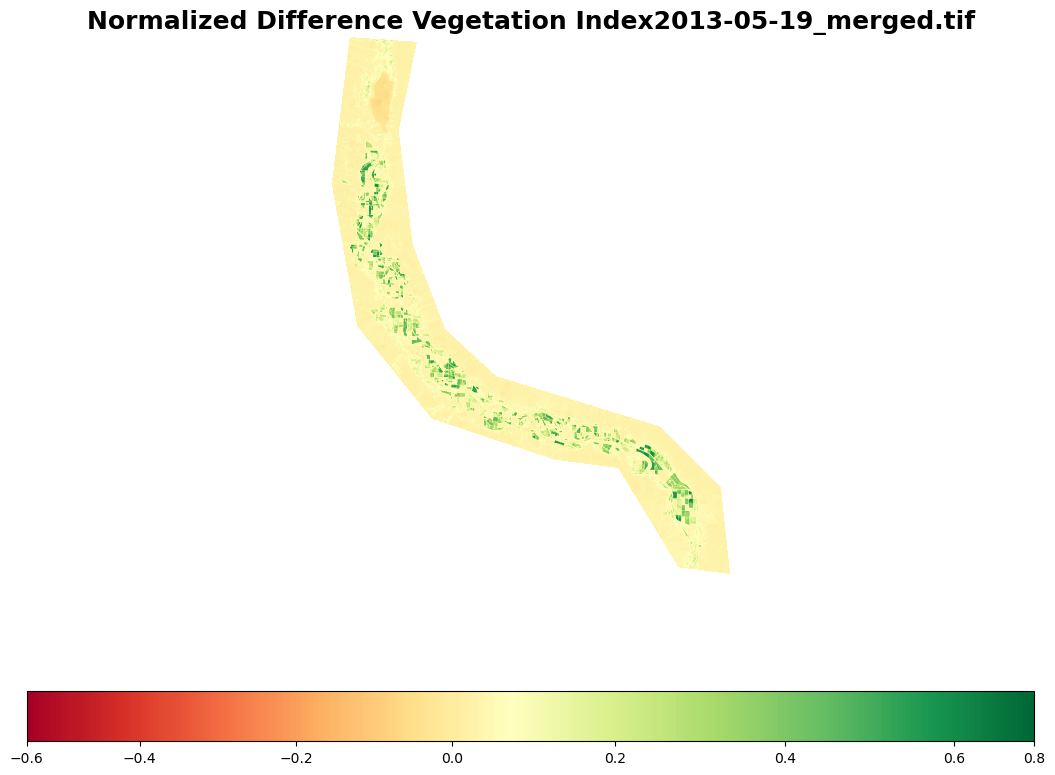

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

"""
The NDVI values will range from -1 to 1. You want to use a diverging color scheme to visualize the data,
and you want to center the colorbar at a defined midpoint. The class below allows you to normalize the colorbar.
"""

class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    Credit: Joe Kington, http://chris35wills.github.io/matplotlib_diverging_colorbar/
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))


# Set min/max values from NDVI range for image (excluding NAN)
# set midpoint according to how NDVI is interpreted: https://earthobservatory.nasa.gov/Features/MeasuringVegetation/
min=np.nanmin(ndvi)
max=np.nanmax(ndvi)
mid=0.1

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# diverging color scheme chosen from https://matplotlib.org/users/colormaps.html
cmap = plt.cm.RdYlGn 

cax = ax.imshow(ndvi, cmap=cmap, clim=(min, max), norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max))

ax.axis('off')
ax.set_title('Normalized Difference Vegetation Index'+str(filename), fontsize=18, fontweight='bold')

cbar = fig.colorbar(cax, orientation='horizontal', shrink=0.65)

fig.savefig(str(filename)+"ndvi-fig.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

plt.show()

## 7. Generate a histogram of NDVI values

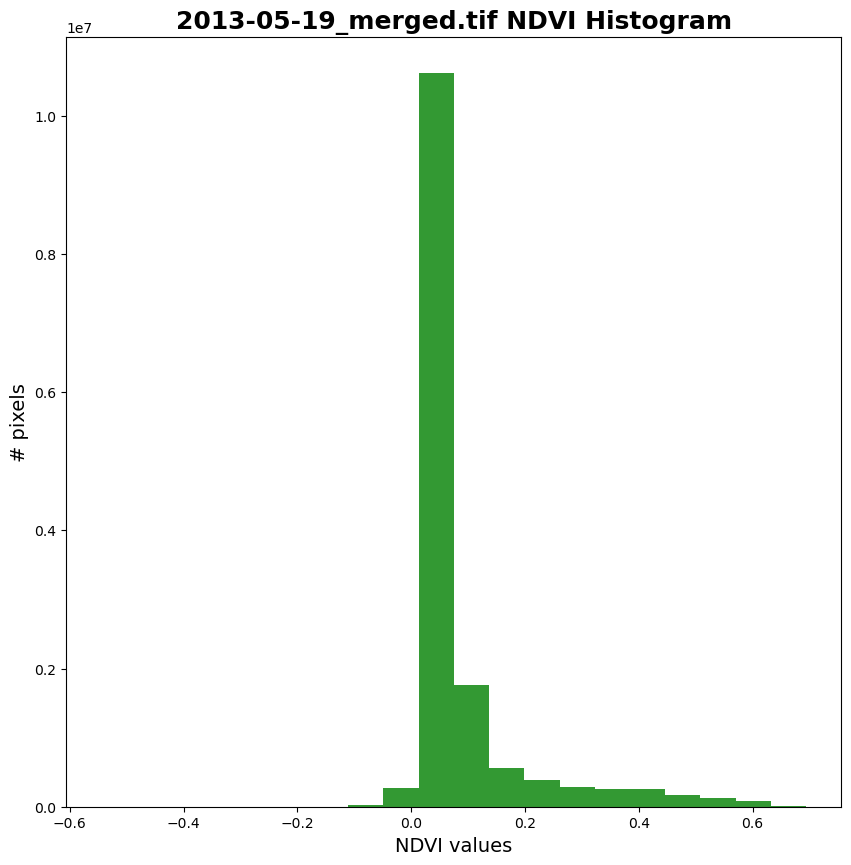

In [ ]:
fig2 = plt.figure(figsize=(10,10))
ax = fig2.add_subplot(111)

plt.title(str(filename)+" NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI values", fontsize=14)
plt.ylabel("# pixels", fontsize=14)


x = ndvi[~np.isnan(ndvi)]
numBins = 20
ax.hist(x,numBins,color='green',alpha=0.8)

fig2.savefig(str(filename)+" ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

plt.show()